<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Install-and-load-necessary-libraries" data-toc-modified-id="Install-and-load-necessary-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Install and load necessary libraries</a></span></li></ul></li><li><span><a href="#Create-our-AHP-Tree" data-toc-modified-id="Create-our-AHP-Tree-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create our AHP Tree</a></span></li><li><span><a href="#Some-basic-analysis" data-toc-modified-id="Some-basic-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Some basic analysis</a></span></li></ul></div>

# Introduction

This [Jupyter](https://jupyter.org) notebook performs the analysis of Dr. Bill Adams' and Dr. Jay Stryker consumer choice AHP model for cell phones (see [github.com/wjladams/consumerAHP](https://github.com/wjladams/consumerAHP))

## Install and load necessary libraries

In [ ]:
%pip install pyanp

In [14]:
from pyanp import ahptree
import numpy as np
import pandas as pd
import re
from copy import deepcopy
from helpers import *
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

In [16]:
plt.rcParams["figure.figsize"] = (12,7)

# Create our AHP Tree

In [17]:
from io import BytesIO

import requests
r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1oLTZ2RBfms0jkvMR0dg1_A6TEs8KipXdma_XyUIcF4o&output=csv')
#r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1jxuBHUYA8Jy5iSRx2PZ7lNg0Ag2gf-cC63LoCCru-j4&output=csv')
data = r.content
df = pd.read_csv(BytesIO(data))
df.tail()

,Timestamp,Considering: Work/life balance,Considering: Relationships with coworkers and management,Considering: Salary,Considering: Professional fulfillment,Considering: Work/life balance versus Relationships with coworkers and management,Considering: Relationships with coworkers and management versus Salary,Considering: Salary versus Professional fulfillment,Considering: Work/life balance versus Salary,Considering: Relationships with coworkers and management versus Professional fulfillment,Considering: Work/life balance versus Professional fulfillment,Name,Age,Location
0,3/14/2021 15:14:42,A Possible New Job is better,My Current Job is better,A Possible New Job is much better,A Possible New Job is better,Work/life balance is much more important,Salary is more important,Professional fulfillment is more important,Salary is more important,Professional fulfillment is more important,Work/life balance is more important,Phil,20-29,Central America
1,3/14/2021 16:40:35,My Current Job is much better,A Possible New Job is better,They are basically equal,A Possible New Job is much better,Work/life balance is much more important,Salary is more important,Salary is more important,Work/life balance is much more important,Professional fulfillment is more important,Professional fulfillment is much more important,John,Under 20,South America
2,3/14/2021 18:03:27,My Current Job is much better,My Current Job is much better,A Possible New Job is better,A Possible New Job is much better,Work/life balance is much more important,Relationships with coworkers and management is...,Salary is more important,Work/life balance is much more important,Relationships with coworkers and management is...,Work/life balance is more important,Silly String,Under 20,Oceania
3,3/14/2021 18:30:55,My Current Job is better,A Possible New Job is better,My Current Job is much better,A Possible New Job is much better,They are basically equal,Salary is more important,Professional fulfillment is much more important,They are basically equal,Professional fulfillment is much more important,Professional fulfillment is more important,Strange Ish,40-49,USA


* We need to convert the votes

In [18]:
vs = " vs "
a1 = 'My Current Job'
a2 = 'A Possible New Job'
n1 = 'Work/life balance'
n2 = 'Relationships with coworkers and management'
n3 = 'Salary'
n4 = 'Professional fulfillment'
df.rename(columns = {
    'Considering: Work/life balance':a1+vs+ a2+ " wrt Work/life balance",
    'Considering: Relationships with coworkers and management':a1+vs+a2+" wrt Relationships with coworkers and management",
    'Considering: Salary':a1+vs+a2+" wrt Salary",
    'Considering: Professional fulfillment':a1+vs+a2+" wrt Professional fulfillment",
    'Considering: Work/life balance versus Relationships with coworkers and management':n1+vs+n2,
    'Considering: Relationships with coworkers and management versus Salary':n2+vs+n3,
    'Considering: Salary versus Professional fulfillment':n3+vs+n4,
    'Considering: Work/life balance versus Salary':n1+vs+n3,
    'Considering: Relationships with coworkers and management versus Professional fulfillment':n2+vs+n4,
    'Considering: Work/life balance versus Professional fulfillment':n1+vs+n4,
}, inplace = True)
for col in df.columns:
    if re.search(r'\s+vs\s+',col):
        df[col] = betterScaleDataToNumeric(col, df[col])
df

,Timestamp,My Current Job vs A Possible New Job wrt Work/life balance,My Current Job vs A Possible New Job wrt Relationships with coworkers and management,My Current Job vs A Possible New Job wrt Salary,My Current Job vs A Possible New Job wrt Professional fulfillment,Work/life balance vs Relationships with coworkers and management,Relationships with coworkers and management vs Salary,Salary vs Professional fulfillment,Work/life balance vs Salary,Relationships with coworkers and management vs Professional fulfillment,Work/life balance vs Professional fulfillment,Name,Age,Location
0,3/14/2021 15:14:42,0.5,2.0,0.2,0.5,5.0,0.5,0.5,0.5,0.5,2.0,Phil,20-29,Central America
1,3/14/2021 16:40:35,5.0,0.5,1,0.2,5.0,0.5,2.0,5.0,0.5,0.2,John,Under 20,South America
2,3/14/2021 18:03:27,5.0,5.0,0.5,0.2,5.0,5.0,2.0,5.0,2.0,2.0,Silly String,Under 20,Oceania
3,3/14/2021 18:30:55,2.0,0.5,5.0,0.2,1,0.5,0.2,1,0.2,0.5,Strange Ish,40-49,USA


In [19]:
ahp = ahptree.ahptree_fromdf(df)
ahp

# Some basic analysis

<AxesSubplot:>

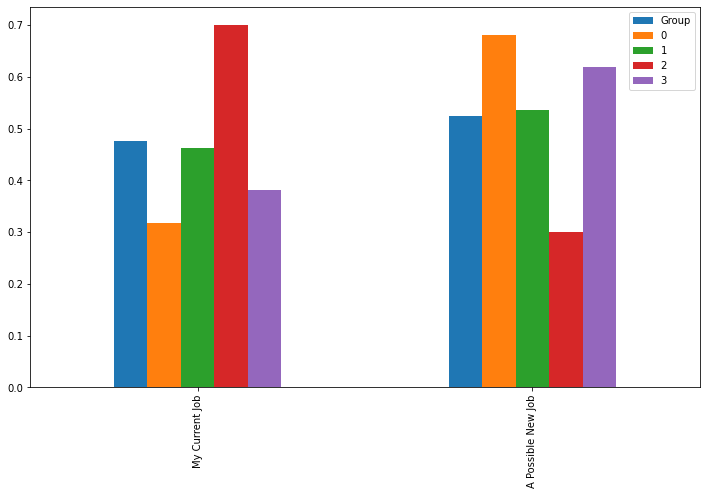

In [20]:
altscores = ahp.priority_table()
altscores.plot(kind="bar")